# Classification and Distribution of M and S-type Asteroids
## Introduction to Data Science (MATH 4100/COMP 5360) Final Project
## Matt Storie (u1136903) and Ian Wixom (u1201040)
---
# Background and Motivation
As our species becomes more proficient in spacefaring and operations, our demand for critical metals such as nickel, iron, gold, palladium, and many others will also increase. M-type (or Metallic) asteroids occur in our system and can be a potential source of material for our civilizations. However, to reach these asteroids will be difficult and potentially very costly. Furthermore, our group does not know what the distribution of M-type asteroids looks like in common asteroid clusters (see right) such as the Asteroid Belt, Jupiter’s Trojans or in the Kuiper Belt. Therefore, by using a comprehensive database from NASA, we can search for potential regions of interest and suggest space mining operations there. Ian is currently a contractor for Ames Research Center who does work on orbital mechanics and software development for the HelioSwarm project, with some experience in prior class research in Lagrangian Points for Intro to Numerical Analysis. Matthew has experience in the University of Utah’s Applied Cognition Laboratory, and working with statistical analysis of complex datasets.
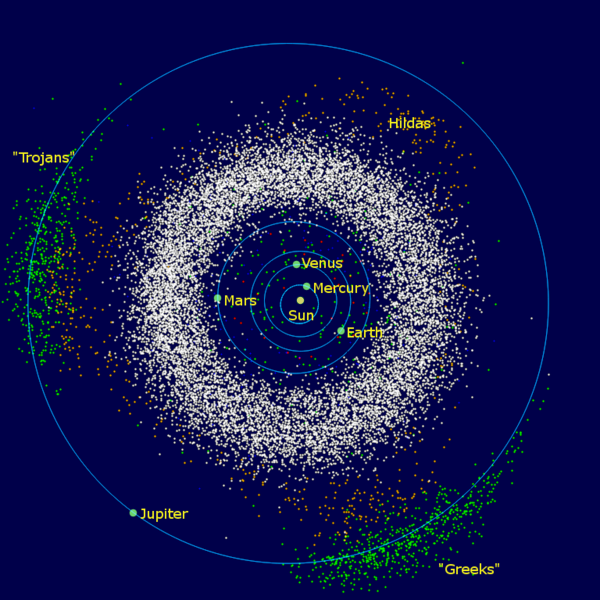

---
# Objectives: 
This project aims to identify what regions of our solar system contain high concentrations of M-type asteroids, and the characteristics of such regions. There are multiple regions of our solar system which have a higher density of asteroids, -asteroid clusters- and the composition of asteroids can vary greatly. Identifying a handful of specific bodies would be helpful for preliminary ventures to test the concept of extracting minerals from asteroids, but a large-scale industry centered around mineral extraction from these bodies would need to know what asteroid clusters are the most rich in M-type asteroids specifically. First, we aim to determine which asteroid cluster contains the greatest density of M-type asteroids in our solar system. Then, we will analyze the distribution of asteroid types in this cluster, density of asteroids overall, distribution of size, and average distance from the orbital path of the Earth. These characteristics should provide a goal to reach toward in future space expeditions, as serious thought on how to begin mineral extraction on asteroids cannot begin until the objective itself is well-defined. 

---
# Data Descriptions (may need to work on this section title)

That dataset being used in this analysis was aquired from the [Small-Body Database Query](https://ssd.jpl.nasa.gov/tools/sbdb_query.html) from Jet Propulsion Laboratory. From this database, we retrieved all availible data from the inner-main belt asteroid group (defined by asteroids with a semi major axis (sma) greater than 2.0 astronomical units (au), and perihelion (peri) greater than 1.666 au), the main-belt asteroid group (2.0 au < sma < 3.2 au, peri > 1.666 au), the outer main-belt asteroid group (3.2 au < sma < 4.6 au), and Jupiter’s trojans (a group of asteroids locked behind jupiter in it's orbital path).

The variables we included in the set, the abreviation in the data frame, units of measurement, and a decription are listed below:
- Semi-Major Axis ('a', au): Semi-major axis of the eliptical orbit 
- Eccentricity('e'): Eccentricity of the eliptical orbit
- Inclination ('i', degrees): Tilt of an asteroid's orbit between the earth and the sun relative to the x,y plane. 
- Longitude of the Ascending Node ('om', degrees): Where in the orbital path the highest point (relative to the x,y plane) is of the orbital path. 
- Argument of Perhelion ('peri', degrees): Rotational position of the plane created by the eliptical orbit. 
- Perhelion Distance('q', au): Closest distance from the sun in the eliptical orbit
- Alphelion Distance('ad', au): Furthest distance from the sun in the eliptical orbit
- Period ('per_y', years): Length of one full orbital period
- Number of Observations ('n_obs_used'): Number of observations of the asteroid
- Absolute Magnitude Parameter ('H', M): Magnitude (brightness) of an asteroid if it were exactly 1 AU from the earth and sun, with a phase angle of zero. Used as a standard measure of the brightness emitted by celestial bodies, accounting for differences in perceived brightness due to differences in distance, and angle of reflectance. 
- Diameter ('diameter', km): Diameter of a sphere of equivilant volume
- Extent ('extent', km): Tri-axial ellipsiod dimensions
- Albedo ('albedo'): Proportion of light reflected by surface of the asteroid
- Rotation Period ('rot_per', hours): Period lengh for one full rotation
- Standard Gravitational Parameter ('GM', km^3/s^2): Measure of the gravitational force emitted by the asteroid. Product of the asteroid's mass and the gravitational constant
- B-V Color Index Magnitude difference ('BV', Kelvin): Difference in color temperature between the relfected blue and visual bands of light.
- U-B Color Index Magnitude Difference ('UB', Kelvin): Difference in color temperature between the reflected ultraviolet and blue bands of light.
- I-R Color Index Magnitude Difference ('IR'm Kelvin): Difference in color temperature between the relected in infrared and red bands of light.
- SMASSII Classification ('spec_b'): Classification of the spectral type of asteroid under the SMASSII taxonomic system
- Tholen Classification ('spec_t'): Classification of the spectral type of asteroid under the Tholen taxonomic system
---
# Data Processing
First, we load in all of the needed libraries for the analysis, the csv files into a Pandas data frame, and account for missing values. Due to the large size of the set (over 1 million rows) the csv was split into two parts, which also need to be joined into one data frame.

In [1]:
#Import and Setup
import pandas as pd
import scipy as sc
import numpy as np
import re
import math
import seaborn as sns
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

#Custom Functions for use later
#Increases print output for one printing
def print_all(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [2]:
#Imports are large so they are kept in an individual cell
astro1 = pd.read_csv('C:/Users/matts/ds/Classification-and-Analysis-of-M-type-Asteroids/split_astro_ds_1.csv', low_memory = False)
astro2 = pd.read_csv('C:/Users/matts/ds/Classification-and-Analysis-of-M-type-Asteroids/split_astro_ds_2.csv', low_memory = False)

In [3]:
# Data Frame Formatting
# The Second file did not have all of the same columns, so we are adding them now
# and filling missing values with NA
astro2.columns = ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'n_obs_used', 'H',
       'diameter', 'extent', 'albedo', 'rot_per']
astro2['GM'] = np.nan
astro2['BV'] = np.nan
astro2['UB'] = np.nan
astro2['IR'] = np.nan
astro2['spec_B'] = np.nan
astro2['spec_T'] = np.nan
astro = pd.concat([astro1, astro2])

---
# Exploratory Analysis  
## *Preliminary investigation*
First, we will examine how many asteroids are already classified, and how many remain unclassified

In [5]:
tot_unclassified = len(astro[(astro['spec_T'].isnull()) & (astro['spec_B'].isnull())])
print("There are",len(astro),"total asteroids in the dataset")
print((len(astro)-tot_unclassified), "asteroids have been classified, while",tot_unclassified,"remain unclassified.")

There are 1048573 total asteroids in the dataset
1742 asteroids have been classified, while 1046831 remain unclassified.


From this we can see that the overwhelming majority (~99.8%) of asteroids have note been classified. Before developing a method of classifying the unclassified asteroids, we will examine the distribution of classified asteroids. First with the SMASSII taxonomy: 

In [6]:
# Creating SMASSII Distribution table from the style method, using the 
# panadas value.counts output series:
smass = astro['spec_B'].value_counts()
smass_df = pd.DataFrame({'Spectral Type':smass.index, 'Value Counts':smass.values})
smass_table = smass_df.style.set_caption('SMASSII Categories') \
    .set_table_styles([{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '16pt')]}]) \
    .set_properties(**{'text-align': 'center', 'border-color': 'white', 'font-size': '12pt'}) \
    .hide_index()
display(smass_table)

C:\Users\matts\AppData\Local\Temp\ipykernel_19152\728119769.py:5: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  smass_table = smass_df.style.set_caption('SMASSII Categories') \


The categories we are interested are S and X type asteroids, which are the first and fourth most common types (respectively). We are not including trasition types (Xe, Sq, etc) as their parameters for classification are more nuanced and may disrupt the machine learning methods we will use to sort the unclassified asteroids later on. Furthermore, these transition asteroids may or may not be of interest to our orginal goal of identifying mineral-rich M type asteroids, so they will be excluded from the asteroids of interest in this analysis. 

We will take the same approach with the Tholen taxonomic system:

In [7]:
tholen = astro['spec_T'].value_counts()
tholen_df = pd.DataFrame({'Spectral Type':tholen.index, 'Value Counts':tholen.values})
tholen_table = tholen_df.style.set_caption('Tholen Categories') \
    .set_table_styles([{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '16pt')]}]) \
    .set_properties(**{'text-align': 'center', 'border-color': 'white', 'font-size': '12pt'}) \
    .hide_index()
display(tholen_table)

C:\Users\matts\AppData\Local\Temp\ipykernel_19152\646623323.py:3: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  tholen_table = tholen_df.style.set_caption('Tholen Categories') \


Again, the cateogries of interest - S and M- are the first and fourth most common. Since most asteroids which had a classification were classified under both systems, this is to be expected. Again, we are excluding transition categories to greate a roubust sameple to train the machine learing classifier.

---
### Classification by Density

Using extent and/or diameter and the gravitational constant, we can determine the average desnity of an unclassified asteroid and determine if it is likely to have a high concentration of metallic minerals. 

*Copy and refine regex code from PCA file to show it works*
*Aknowladge that there are few asteroids with both GM and extent listed*
*can use this in the results and/or evaluation section*

In [41]:
# Creating a regex function to get the dimensions from the string containing them in 
# the extent variable


def calc_volume(extent_str):
    match = re.search(r"([\d.]+)\s*x\s*([\d.]+)\s*x\s*([\d.]+)", extent_str)
    extent_list = (match.groups())
    float_list = []
    for x in extent_list:
        float_list.append(float(x))
    return (4/3 * math.pi * float_list[0] * float_list[1] * float_list[2])

# Creating a loop to calculate extent of all asteroids with extent
volume = []
extents = astro.loc[astro['extent'].notna(), ['extent']]
for x in extents['extent']:
    volume.append(calc_volume(x))
extents['volume'] = volume
extents.head()

extent        volume
0    964.4 x 964.2 x 891.8  3.473605e+09
1              568x532x448  5.670568e+08
3    572.6 x 557.2 x 446.4  5.965890e+08
15         279 x 232 x 189  5.124395e+07
214              276x94x78  8.476570e+06

After checking the functionality of the volume function, we found that the number of asteroids with extent listed was quite small, at only 5 asteroids. Furthermore, all of these asteroids had already been classified so we concluded that classification by estimation of density would not yeild any new information.

---
### Classification by Albedo using Support Vector Machines

Using a training set of classified metallic and non-metallic asteroids, we will be training a model to identify asteroids of interest from those which are unsorted. Before using the model on unclassified asteroids, we will assess the accuracy of the model. 
Among the variables which provide information related to composition (albedo, standard gravitation parameter, UB color difference, IR color differnece, and BV color index), albedo was by far the most frequently recorded variable. Consequently, the first model of classification will utilize only albedo in order to capture as many unclassified asteroids as possible. 

In [59]:
# Subsetting metal asteroids and getting an equal amount of classified, nonmetal asteroids
classified = astro.loc[(((astro['spec_T'].notnull()) | (astro['spec_B'].notnull())) & astro['albedo'].notnull())]
metal = classified.loc[(classified['spec_T'] == "M") | (classified['spec_B'] == 'X') | 
                   (classified['spec_B'] == 'S') | (classified['spec_T'] == 'S')]
nonmetal = classified.loc[(classified['spec_T'] != "M") & (classified['spec_B'] != 'X') &
                 (classified['spec_B'] != 'S') & (classified['spec_T'] != 'S')]

# Sampling from the nonmetal dataset equally
nonmetal_sample = nonmetal.sample(n=(len(metal)))
metal.insert(20, "m_id", '1')
pd.to_numeric(metal["m_id"])
nonmetal_sample.insert(20, "m_id", '0')
pd.to_numeric(nonmetal_sample["m_id"])
training_set = pd.concat([metal, nonmetal_sample])

# Creating the model
y_var = training_set['m_id'].to_numpy()
np.reshape(y_var, (1, -1))
X_var = training_set['albedo'].to_numpy()
X_var = scale(X_var)

## Preliminary single-variable SVB model
x_train, x_test, y_train, y_test = train_test_split(X_var, y_var, random_state=1, test_size=0.8)
x_train = np.reshape(x_train, ((len(x_train), 1)))
x_test = np.reshape(x_test, ((len(x_test), 1)))

svm_train = svm.SVC(kernel="rbf", C=100, gamma=0.01)
svm_train.fit(x_train, y_train)
test_pred = svm_train.predict(x_test)
print("\nConfusion Matrix of SVM Model")
print(metrics.confusion_matrix(y_true = y_test, y_pred = test_pred))
print("\nAccuracy Score of SVM Model")
print(metrics.accuracy_score(y_true = y_test, y_pred = test_pred))


Confusion Matrix of SVM Model
[[393 149]
 [ 85 463]]

Accuracy Score of SVM Model
0.7853211009174312


Considering this model is only using one variable, an accuracy of nearly 80% is promising. Before the main analysis with this method, we will be assessing it by cross validation as well to ensure accuracy

In [60]:
# Testing with cross validation score, not just the 50/50 split to double check accuracy
X_var = np.reshape(X_var, ((len(X_var), 1)))
svm_train.fit(X_var, y_var)
test_score = cross_val_score(estimator = svm_train, X = X_var, y = y_var, cv=5, scoring = "accuracy")
print("The mean accuracy across five cross validation trials was")
print(np.mean(test_score))

The mean accuracy across five cross validation trials was
0.7973550958845076


Cross validation yeilded a very similar accuracy. We found 78%-79% to be sufficently high enough to apply this method to the entire set.

In [64]:
svm_subset = astro.loc[(astro["albedo"].notna() & astro["spec_T"].isna() & astro['spec_B'].isna())]
full_x = svm_subset["albedo"].to_numpy()
full_x = scale(full_x)
full_x = np.reshape(full_x, ((len(full_x), 1)))
full_pred = svm_train.predict(full_x)
svm_subset.insert(20, 'isrelevant', full_pred)

--- 
# Data Visualization
## Support Vector Machines Classification
Below are scatter plots of the asteroids already identified in the set (left) and the unidentified asteroids sorted by the SVM model (right) where red points indicated asteroids of interest. The first set of plots compare albedo on the y axis and diameter on the x axis. This was done to examine the distribution of size of the asteroids of interest in the general population. From the plot of the already captured asteroids, we can see that metallic asteroids are present of all sizes, but are most frequet in the 0.1-0.4km range. The SMV model appears to reflect this general clustering, but notably appears to have many false postives in this range. If the total asteroid population is similar to the sample of already identified asteroids, then the SVM model captures the general clustering of metallic asteroids, but is likely to have many false positives. 

<function matplotlib.pyplot.show(close=None, block=None)>

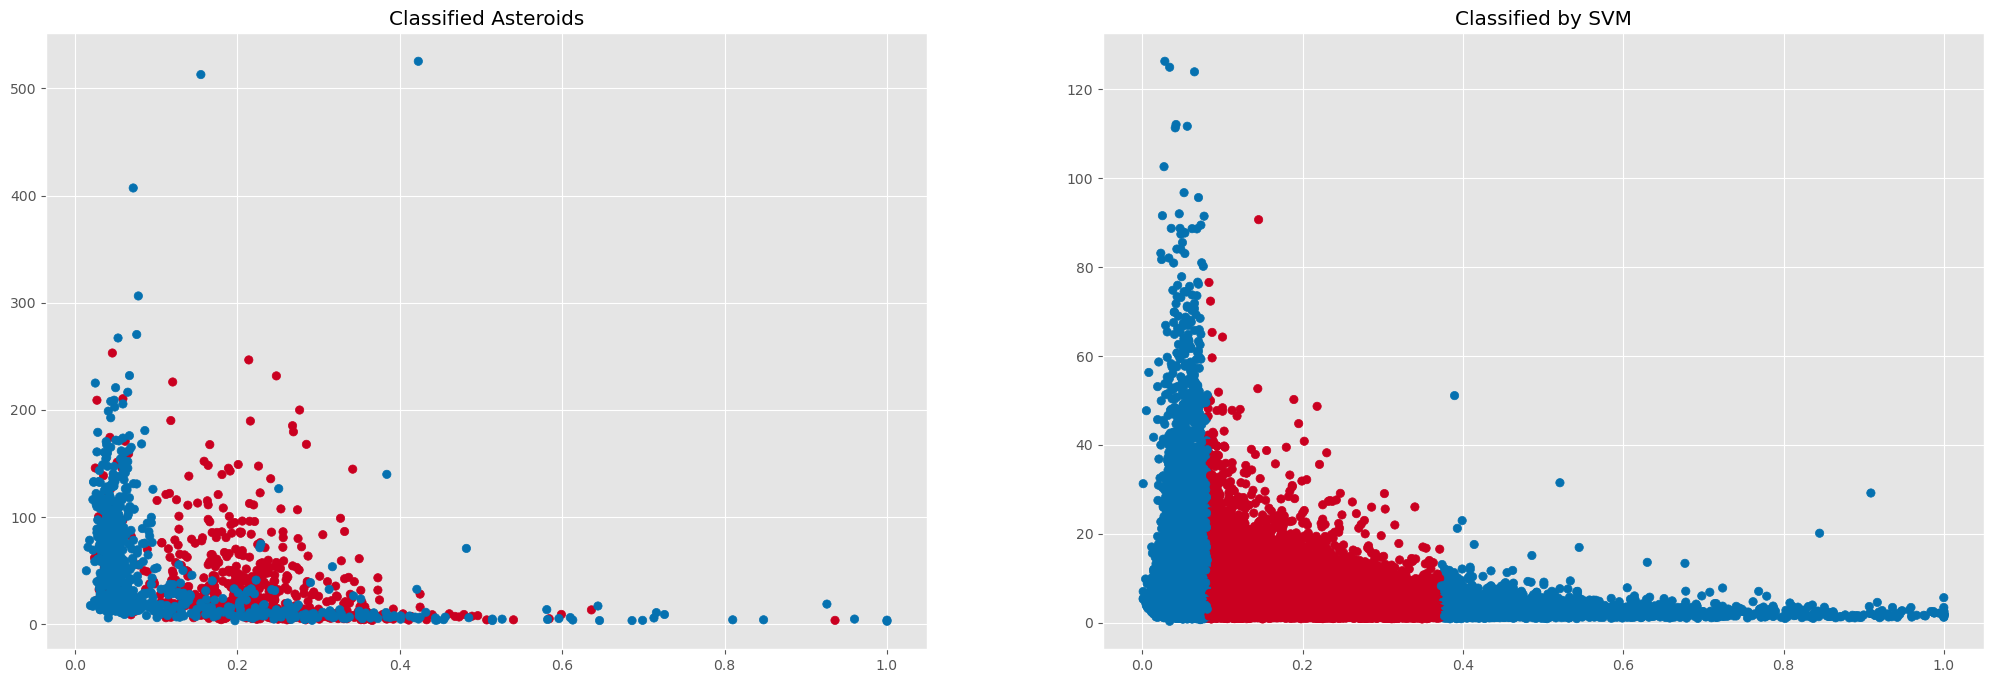

In [67]:
colors = svm_subset["isrelevant"].map({'1':'#ca0020', '0':'#0571b0'})
colors2 = training_set["m_id"].map({'1':'#ca0020', '0':'#0571b0'})
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize =(25,8))
ax1.scatter(training_set['albedo'], training_set['diameter'], color = colors2)
ax1.set_title('Classified Asteroids')

ax2.scatter(svm_subset['albedo'], svm_subset['diameter'], color = colors)
ax2.set_title("Classified by SVM")

plt.show

In this second set of plots, closest point to the sun of an asteroid's orbital path is compared against diameter, again with red points indicating asteroids of interest. We can see that a significant amount of asteroids of interest exist in all distances in the solar system, and are represented in both clusters. This is particularly important to our research objectives, as it demonstrated that there are asteroids of interest of greatly varying size close to the orbital distance of Earth, which we will discuss further in the results section. 

<function matplotlib.pyplot.show(close=None, block=None)>

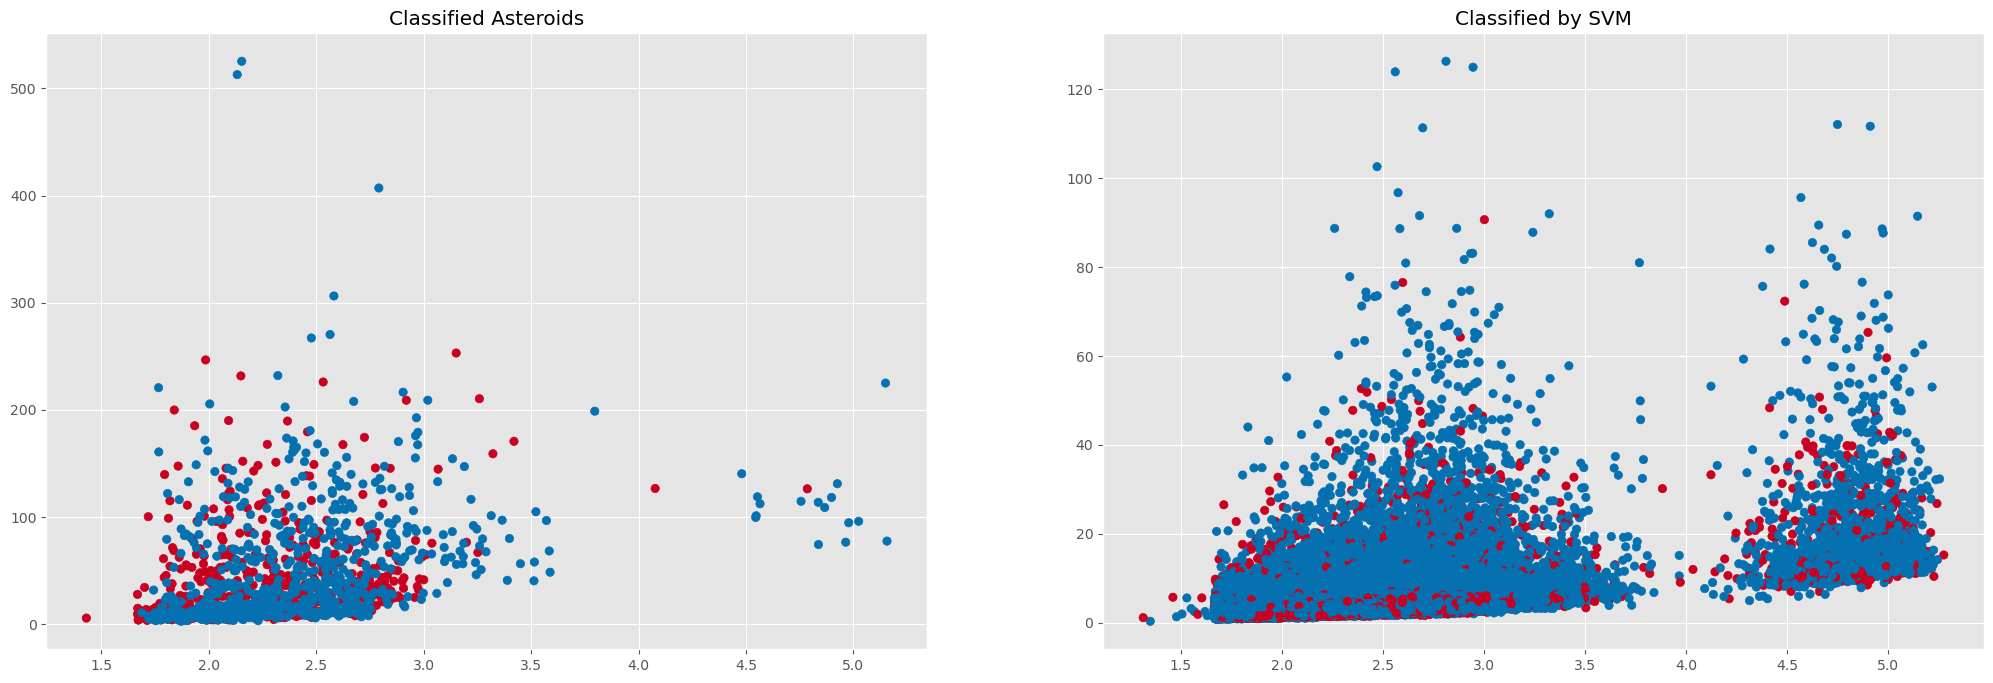

In [68]:
colors = svm_subset["isrelevant"].map({'1':'#ca0020', '0':'#0571b0'})
colors2 = training_set["m_id"].map({'1':'#ca0020', '0':'#0571b0'})
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize =(25,8))
ax1.scatter(training_set['q'], training_set['diameter'], color = colors2)
ax1.set_title('Classified Asteroids')

ax2.scatter(svm_subset['q'], svm_subset['diameter'], color = colors)
ax2.set_title("Classified by SVM")

plt.show

In [70]:
# Getting some basic statistics to discuss further in the results section


           diameter
count  59546.000000
mean       4.326765
std        3.314822
min        0.855000
25%        2.508000
50%        3.518000
75%        4.970000
max       90.647000
count    1705.000000
mean       46.998151
std        54.965704
min         2.613000
25%        11.211000
50%        27.332000
75%        66.858000
max       939.400000
Name: diameter, dtype: float64


## Principle Component Analysis Classification (delete if unused)
notes on PCA graphics go here

In [ ]:
# PCA visuals go here

## Neural Network Classification (delete if unused)

In [ ]:
# Neural network visuals go here

---
# Results
## General Results
Overall, very few of the asteroids that have been identified have been classified by their likely composition, and of the unclassified asteroids, very few have sufficient spectrographic data availible to accurately classify them. 

The population of asteroids already classified in categories of interest had greatly varying diameters (N=681, m = 36.2km, std = 40.6km), and existed between 1.43 and 4.79 AU from the sun, with 50% being 2.22 AU or closer. 

The population of unclassified asteroids were overall significantly smaller(N = 135,914, m = 4.96km, std = 4.40km) than the classified asteroid population(N = 1705, m = 50.0km, std = 55.0km), likely to due to the fact that larger asteroids are more easily observed, leading to better data which allows for classification. 

Metallic asteroids were common in both near-Earth asteroid clusters, as well as distant clusters such as Jupiter's Trojans. 
## Support Vector Machine Approach
The Support Vector Machine categorization approach yeilded an accuracy of approximately 78% in testing. This approach categorized asteroids soley by albedo, as it was the most frequently present spectography variable that could be used to classify asteroids. This had the benefit of catogorizing the most amount of unclassified asteroids. It had limitations, as it overfit the data significantly, and was mostly limited to capturing the largest cluster of asteroids of interest. This still provided valuable insight into the general distrubtion of metallic asteroids among the unclassified population. Metallic asteroids identified by the model were found in all clusters present, and were much smaller overall, but still with significant variance (N = 59,287, m=4.33km, std=3.32km).

Graphical representation of the results 



In [71]:
print("Identified Asteroid Diameter Stats")
print(svm_subset.loc[(svm_subset['isrelevant'] == '1'), ['diameter']].describe())
print("\nOverall Unclassified Diameter Stats")
unclassified = astro[(astro['spec_T'].isnull()) & (astro['spec_B'].isnull())]
print(classified['diameter'].describe())

Identified Asteroid Diameter Stats
           diameter
count  59546.000000
mean       4.326765
std        3.314822
min        0.855000
25%        2.508000
50%        3.518000
75%        4.970000
max       90.647000

Overall Unclassified Diameter Stats
count    1705.000000
mean       46.998151
std        54.965704
min         2.613000
25%        11.211000
50%        27.332000
75%        66.858000
max       939.400000
Name: diameter, dtype: float64


## Principle Component Analysis Approach
results go here

In [ ]:
# stat code goes here

## Neural Network Approach
results go here

In [ ]:
# Stat code goes here

---
# Evaluation
it was a project of all time lol

---
# Summary

**What is an overview of your project?**
We used machine learning models to classify asteroids which may be of interest due to high metallic mineral content. We also examined how these asteroids of interest are distributed, and the charecteristics of the metallic asteroid population.

**What are your project Objectives?**
To charecterize the distribution of metallic asteroids in the solar system, and classify unclassified asteroids using availible data. 

**What are your technical contributions?**
Our analyses with multiple machine learing approaches demonstrate that relatively accurate classification can be done with more limited information on asteroids. Future classification may be done by machine learning in general cases, with human oversight for asteroids with ambigous characteristics. 

**What are the main results**
Metallic asteroids of varying size are well represented in clusters near and distant from the earth. The overwhelming body of unidentified asteroids are also significantly smaller, but with sizes commonly over 40km these relatively small asteroids would still serve as sutible resources for mineral extraction. 

**What are the future directions?**
Future research should examine asteroids in the near-earth asteroid belt since it was shown to be sufficiently rich in small and large metallic asteroids. Additionally the analysis should be run periodically as more information is gathered on the asteroids which have missing values. 

## Ethical Data Concerns
Data used in this analysis is publicially availible, and does not contain sensitive information about any individuals, organizations, or property. Accuracy was reported for novel analyses and sufficient explanation of the results was given to not misrepresent availible data. Code to arrive at our conclusions was included so that results may be replicated. All asteroids in the set had at least 33 observations, so we can be confident that the values listed for the variables included are accurate.